**Authors :** Alexandre Sukeratha, Jules Michaud

# Project Econometrics - Part 1
_Important : some cells require the previous cells to be runned to properly function. Therefore, we advise you to press the "Run All" button before taking a look at the NoteBook._

### Importing librairies 

In [109]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

### Importing the Data Set

In [110]:
df = pd.read_csv('MROZ.csv', header=None, delimiter=";")
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.91006,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.49998,.3285121,25


### Description of the Data Set
|Column Number |Name |Description|
|--|--|--|
|0. |inlf                     |=1 if in labor force, 1975|
|1. |hours                    |hours worked, 1975|
|2. |kidslt6                  |# kids < 6 years|
|3. |kidsgt6                  |# kids 6-18|
|4. |age                      |woman's age in yrs|
|5. |educ                     |years of schooling|
|6. |wage                     |estimated wage from earns., hours|
|7. |repwage                  |reported wage at interview in 1976|
|8. |hushrs                   |hours worked by husband, 1975|
|9. |husage                   |husband's age|
|10. |huseduc                  |husband's years of schooling|
|11. |huswage                  |husband's hourly wage, 1975|
|12. |faminc                   |family income, 1975|
|13. |mtr                      |fed. marginal tax rate facing woman|
|14. |motheduc                 |mother's years of schooling|
|15. |fatheduc                 |father's years of schooling|
|16. |unem                     |unem. rate in county of resid.|
|17. |city                     |=1 if live in SMSA|
|18. |exper                    |actual labor mkt exper|
|19. |nwifeinc                 |(faminc - wage*hours)/1000|
|20. |lwage                    |log(wage)|
|21. |expersq                  |exper^2|

## Table of contents
_Disclaimer: The following links take you to the end of each respective question._
* [Question 1](#q1)
* [Question 2](#q2)
* [Question 3](#q3)
* [Question 4](#q4)
* [Question 5](#q5)
* [Question 6](#q6)
* [Question 7](#q7)
* [Question 8](#q8)
* [Question 9](#q9)
* [Question 10](#q10)
* [Question 11](#q11)
* [Question 12](#q12)
* [Question 13](#q13)
* [Question 14](#q14)
* [Question 15](#q15)
* [Question 16](#q16)

### 1. Removing all rows where `wage` $\leq0$ <a class="anchor" id="q1"></a>

In [111]:
df = df[df[6] > 0]

### 2. Descriptive statistics on `salary`, `age` and `education` <a class="anchor" id="q2"></a>

In [112]:
def desc_stats(feature):
    # Descriptive statistics :
    mean = np.mean(feature)
    var = np.var(feature)
    std = np.std(feature)
    median = np.median(feature)

    # Plotting those statistics :
    print(f'* mean : {mean}')
    print(f'* variance : {var}')
    print(f'* standard error : {std}')
    print(f'* median : {median}')


In [113]:
# Data Set features - data extraction :
mask_hus_med_sup = (df[11] > np.median(df[11]))
mask_hus_med_inf = (df[11] <= np.median(df[11]))

df_hms = df[mask_hus_med_sup]
df_hmi = df[mask_hus_med_inf]

age, age_hms, age_hmi = df[4], df_hms[4], df_hmi[4]
educ, educ_hms, educ_hmi = df[5], df_hms[5], df_hmi[5]
wage, wage_hms, wage_hmi = df[6], df_hms[6], df_hmi[6]

# Plotting the results :
print('===================== All women ========================')
print('-- age --')
desc_stats(age)
print('-- educ --')
desc_stats(educ)
print('-- wage --')
desc_stats(wage)


===================== All women ========================
-- age --
* mean : 41.97196261682243
* variance : 59.47584941916327
* standard error : 7.712058701745161
* median : 42.0
-- educ --
* mean : 12.658878504672897
* variance : 5.21073892916413
* standard error : 2.28270430173602
* median : 12.0
-- wage --
* mean : 4.177681542056075
* variance : 10.932366752579874
* standard error : 3.3064129736891417
* median : 3.4819


In [114]:
print('========== Women with huswage > median(wage) ===========')
print('-- age --')
desc_stats(age_hms)
print('-- educ --')
desc_stats(educ_hms)
print('-- wage --')
desc_stats(wage_hms)


========== Women with huswage > median(wage) ===========
-- age --
* mean : 42.27570093457944
* variance : 54.339876845139344
* standard error : 7.371558644217608
* median : 43.0
-- educ --
* mean : 13.242990654205608
* variance : 5.539086383090221
* standard error : 2.353526371870564
* median : 12.0
-- wage --
* mean : 4.896822429906542
* variance : 16.258248838749235
* standard error : 4.032151886865032
* median : 3.8464


In [115]:
print('========== Women with huswage <= median(wage) ==========')
print('-- age --')
desc_stats(age_hmi)
print('-- educ --')
desc_stats(educ_hmi)
print('-- wage --')
desc_stats(wage_hmi)


========== Women with huswage <= median(wage) ==========
-- age --
* mean : 41.66822429906542
* variance : 64.42730806183945
* standard error : 8.026662323895247
* median : 41.0
-- educ --
* mean : 12.074766355140186
* variance : 4.20001746877458
* standard error : 2.0493944151320846
* median : 12.0
-- wage --
* mean : 3.4585406542056094
* variance : 4.572157433253777
* standard error : 2.1382603754579974
* median : 2.9718


### 3. Histograms and computation of log(`wage`) <a class="anchor" id="q3"></a>

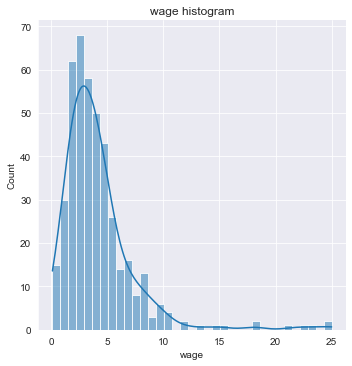

In [116]:
# Histogram of wage :
sns.displot(wage, kde=True)

plt.xlabel('wage')
plt.title('wage histogram')

plt.show()
plt.close()


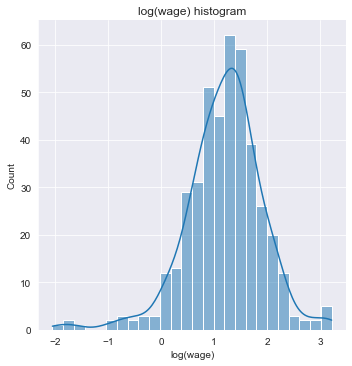

In [117]:
# Computation of log(wage) :
lwage = np.log(wage)

# Histogram of log(wage) :
sns.displot(lwage, kde=True)

plt.xlabel('log(wage)')
plt.title('log(wage) histogram')

plt.show()
plt.close()


**Comments on the two histograms:** The `lwage` distribution is much closer to a Gaussian distribution than its `wage` counterpart. Therefore, it will be more interesting to work with the lwage variable.

### 4. Correlations between `motheduc` and `fatheduc` <a class="anchor" id="q4"></a>

In [118]:
# Computing the correlation matrix :
motheduc, fatheduc = df[14], df[15]
corr = np.corrcoef(motheduc, fatheduc)
print(corr)


[[1.         0.55406322]
 [0.55406322 1.        ]]


The calculated correlation between `motheduc` and `fatheduc` is about 0.55. This high correlation is not surprising since people tend to marry within their social class. However, a multicollinearity problem would arise if we used `motheduc` and `fatheduc` as explanatory variables.

### 5. Data visualisation - scatter plots <a class="anchor" id="q5"></a>

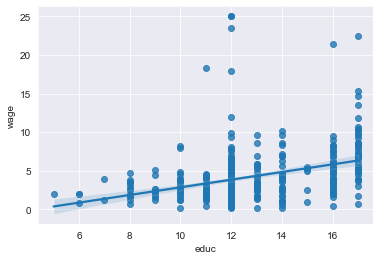

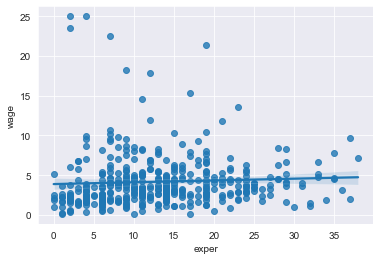

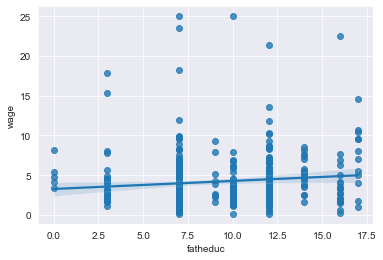

In [119]:
# Features used :
wage = df[6]
educ = df[5]
exper = df[18]
fatheduc = df[15]

# Scatter plot bewteen wage and educ :
sns.regplot(data=None, x=educ, y=wage)
plt.ylabel('wage')
plt.xlabel('educ')
plt.show()

# Scatter plot bewteen wage and exper :
sns.regplot(data=None, x=exper, y=wage)
plt.ylabel('wage')
plt.xlabel('exper')
plt.show()

# Scatter plot bewteen wage and fatheduc :
sns.regplot(data=None, x=fatheduc, y=wage)
plt.ylabel('wage')
plt.xlabel('fatheduc')
plt.show()

plt.close()


_**Plot Analysis :**_
* **1. educ:** in the first plot, we can observe a positive correlation between `wage` and `educ`. Interpretation : more years of education leads to higher wages.
* **2. exper:** the second plot shows a light positive correlation between `wage` and `exper`.
* **3. fatheduc:** the second plot shows a light positive correlation between `wage` and `fatheduc`.

It is not representative of the "ceteris paribus effect" since the other features are not held constant when plotting the correlation between features.


### 6. Fundamental hypothesis <a class="anchor" id="q6"></a>

Fundamental hypothesis for unbiased estimators : 
$$\mathbb{E}(u|x)=\mathbb{E}(u)=0$$
The "omitted variable bias" refers to the situation in which relevant features are omitted when constructing a regression model.

### 7. `wage` regression <a class="anchor" id="q7"></a>

In [120]:
# Useful variables :
city = df[17]
exper = df[18]
nwifeinc = df[19]
kidslt6 = df[2]
kidsgt6 = df[3]


                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        13:37:34   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

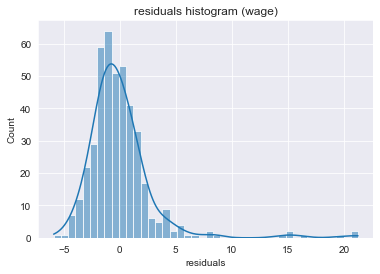

In [121]:
# Dependant variable :
y = wage

# Explicative variable :
const = np.ones(np.shape(y))
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

# OLS :
model = sm.OLS(y, X)
results_w = model.fit()
print(results_w.summary())

# Residuals :
u = results_w.resid
sns.histplot(u, kde=True)

plt.xlabel('residuals')
plt.title('residuals histogram (wage)')

plt.show()
plt.close()


The residuals appear to follow a centered normal distribution.

### 8. `lwage` regression <a class="anchor" id="q8"></a>

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.00e-13
Time:                        13:37:35   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

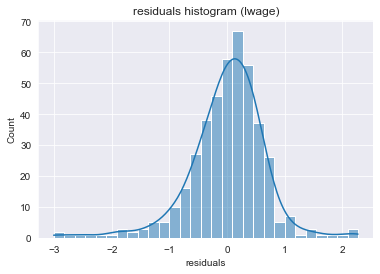

In [122]:
# Dependant variable :
y = lwage

# Explicative variable :
const = np.ones(np.shape(y))
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

# OLS :
model = sm.OLS(y, X)
results_lw = model.fit()
print(results_lw.summary())

# Residuals :
u = results_lw.resid
sns.histplot(u, kde=True)

plt.xlabel('residuals')
plt.title('residuals histogram (lwage)')

plt.show()
plt.close()


As for the `wage` regression, the residuals appear to follow a centered normal distribution. However, the result is more interesting because the variance is much smaller here.

### 9. Assumption of non-significance of `nwifeinc` <a class="anchor" id="q9"></a>

We consider the following hypothesis :
$$H_0 : \beta_{\text{nwifeinc}}=0 \space\text{ against }\space H_1 : \beta_{\text{nwifeinc}}\neq0$$
**Main assumption :** if the p-value is less than or equal to the specified significance level α, the null hypothesis is rejected.

In [123]:
# Test summary functions :
def test_hyp(boolean, alpha):
    if boolean:
        print(f'We reject the hypothesis H0 at {alpha*100}%')
    else:
        print(f'We do not reject the hypothesis H0 at {alpha*100}%')


def std_tst_report(p_value, student, alpha):
    print('========== Student Test Report ==========')
    print(f'* Student statistic : {student}')
    print(f'* p-value : {p_value}')
    student_test = (p_value <= alpha)
    test_hyp(student_test, alpha)


def fsh_tst_report(p_value, F, alpha):
    print('========== Fisher Test Report ==========')
    print(f"* Fisher statistic : {F}")
    print(f'* p_value : {p_value}')
    student_test = (p_value <= alpha)
    test_hyp(student_test, alpha)


In [124]:
# Variables :
beta, std_err = results_lw.params, results_lw.bse
alphas = [0.01, 0.05, 0.1]
n, k = np.shape(X)
ddl = n-k

# Student test :
student = beta[4]/std_err[4]
p_value = t.sf(np.abs(student), ddl)*2
for alpha in alphas:
    print(f'----- Non-significance test ({alpha*100}%) -----')
    std_tst_report(p_value, student, alpha)


----- Non-significance test (1.0%) -----
========== Student Test Report ==========
* Student statistic : 1.465951741624158
* p-value : 0.14340791214518292
We do not reject the hypothesis H0 at 1.0%
----- Non-significance test (5.0%) -----
========== Student Test Report ==========
* Student statistic : 1.465951741624158
* p-value : 0.14340791214518292
We do not reject the hypothesis H0 at 5.0%
----- Non-significance test (10.0%) -----
========== Student Test Report ==========
* Student statistic : 1.465951741624158
* p-value : 0.14340791214518292
We do not reject the hypothesis H0 at 10.0%


According to the notion of significance introduced by Fisher on p-values, as `p_value`$= 0.1434079121451819 > 0.1$, there is no presumption against the null hypothesis. We cannot therefore reject the hypothesis $H_0$, hence the non-significance of the parameter `nwifeinc`.

### 10. Equality test <a class="anchor" id="q10"></a>

We consider the following hypothesis : 
$$H_0 : \beta_{\text{nwifeinc}}=0.01 \space\text{ against }\space H_1 : \beta_{\text{nwifeinc}}\neq0.01$$

In [125]:
# Variables :
beta, std_err = results_lw.params, results_lw.bse
alpha = 0.05
n, k = np.shape(X)
ddl = n-k

# Student test :
student = (beta[4]-0.01)/std_err[4]
p_value = t.sf(np.abs(student), ddl)*2
std_tst_report(p_value, student, alpha)


========== Student Test Report ==========
* Student statistic : -1.536388784674493
* p-value : 0.1251942351511027
We do not reject the hypothesis H0 at 5.0%


### 11. Joint hypothesis test <a class="anchor" id="q11"></a>

We consider the following hypothesis :
$$H_0 : \beta_{\text{nwifeinc}}=0.01 \space\text{ and }\space \beta_{\text{city}}=0.05$$

In [126]:
# Utility function to compute SSR :
def comp_ssr(u):
    ssr = 0
    for elt in u:
        ssr += (elt**2)
    return ssr


In [127]:
# Variables :
alpha = 0.05
q = 2

# Dependant variable :
y_r = lwage
y_ur = lwage - 0.05*city - 0.01*nwifeinc

# Explicative variable :
const = np.ones(np.shape(y))
X_r = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))
X_ur = np.column_stack((const, educ, exper, kidslt6, kidsgt6))

n, k = np.shape(X_r)
ddl = n-k

# OLS :
model_r = sm.OLS(y_r, X_r)
model_ur = sm.OLS(y_ur, X_ur)

results_r = model_r.fit()
results_ur = model_ur.fit()

# Residuals :
u_r = results_r.resid
u_ur = results_ur.resid

# Calculation of SSR_r and SSR_ur (constrained and unconstrained models) :
SSR_r = comp_ssr(u_r)
SSR_ur = comp_ssr(u_ur)

# Fisher test & p-value :
F = ((SSR_ur-SSR_r)/q)/(SSR_r/ddl)
p_value = f.sf(F, q, ddl)
fsh_tst_report(p_value, F, alpha)


========== Fisher Test Report ==========
* Fisher statistic : 1.3370701154055398
* p_value : 0.26372680012868377
We do not reject the hypothesis H0 at 5.0%


### 12. Representation of `wage` regarding `educ` and `exper` <a class="anchor" id="q12"></a> 

If you have not yet downloaded the plotly library, please run the following cell (after deleting the `#`): 

In [128]:
# %pip install plotly

Let's plot the relationships between the $3$ variable :

In [129]:
import plotly.express as px

# Scatter plot
fig = px.scatter_3d(df, x=18, y=5, z=6, color=6,
                labels={
                     '18': "Experience",
                     '5' : "Education",
                     '6' : "Wage"
                 })

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Initial camera view
name = 'eye = (x:2, y:2, z:0.1)'
camera = dict(
    eye=dict(x=2, y=2, z=0.1)
)

fig.data[0].marker.symbol = 'circle'
fig.update_layout(scene_camera=camera)
fig.update_traces(marker_size = 5)

fig.show()

### Note: You can change the camera view by clicking and rotating the following figure.
### Move the mouse over the dots to display more information.

**Notes on the 3D visualisation:**
* Education is important for those with high and low experience. When considering low experience data, the salaries that stand out ( $>15$ ) correspond to those with high education ( $>12$ ).
* When it comes to experience between $10$ and $25$, it is much more difficult to extract a real trend. The data is compact and not very readable.

### 13. Equality test (`kidsgt6` = `kidslt6`) <a class="anchor" id="q13"></a> 

We consider the following hypothesis :
$$H_0 : \beta_{\text{kidsgt6}}=\beta_{\text{kidslt6}}$$
The equation for the study is as follows :
$$
\text{lwage}=\text{const}+\beta_{\text{city}}\text{city}+\beta_{\text{educ}}\text{educ}+\beta_{\text{exper}}\text{exper}+\beta_{\text{nwifeinc}}\text{nwifeinc}+\beta_{\text{kidslt6}}\text{kidslt6}+\beta_{\text{kidsgt6}}\text{kidsgt6}
$$
We consider a new variable : 
$$\theta = \beta_{\text{kidsgt6}}-\beta_{\text{kidslt6}}$$
We insert our newly created variable in the model. We obtain : 
$$
\text{lwage}=\text{const}+\beta_{\text{city}}\text{city}+\beta_{\text{educ}}\text{educ}+\beta_{\text{exper}}\text{exper}+\beta_{\text{nwifeinc}}\text{nwifeinc}+\beta_{\text{kidslt6}}(\text{kidslt6}+\text{kidsgt6})+\theta\text{kidsgt6}
$$
Our initial test becomes :
$$H_0:\theta = 0 \space\text{ against }\space H_1:\theta \neq 0$$
We can now perform a Student test and check the validity of our hypothesis :

In [130]:
# Variables :
alpha = 0.05

# Dependant variable :
y = lwage

# Explicative variable :
const = np.ones(np.shape(y))
X = np.column_stack((const, city, educ, exper, nwifeinc,
                    kidslt6 + kidsgt6, kidsgt6))

# OLS :
model = sm.OLS(y, X)
results = model.fit()

beta = results.params
std_err = results.bse
n, k = np.shape(X)
ddl = n-k

# Student test :
student = beta[6]/std_err[6]
p_value = t.sf(np.abs(student), ddl)*2
std_tst_report(p_value, student, alpha)


========== Student Test Report ==========
* Student statistic : 0.3717472501996143
* p-value : 0.7102680707379367
We do not reject the hypothesis H0 at 5.0%


The hypothesis $H_0$ is validated with a high p-value. Therefore, the coefficients of `kidsgt6` and `kidslt6` can be considered equal with good certainty. Having a child, whether over or under the age of six, has the same influence on the `wage`. 

### 14. Heteroscedasticity test for a linear model <a class="anchor" id="q14"></a>

We consider the following hypothesis :
$$H_0 : \beta_{\text{city}}=\beta_{\text{educ}}=\beta_{\text{exper}}=\beta_{\text{nwifeinc}}=\beta_{\text{kidslt6}}=\beta_{\text{kidsgt6}}=0$$

In [131]:
# Variables :
alpha = 0.05
q = 6

# First OLS :
y = lwage

const = np.ones(np.shape(y))
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

model = sm.OLS(y, X)
results_w = model.fit()
u = results_w.resid

# Dependant variable :
y_r = u**2
y_ur = u**2

# Explicative variable :
const = np.ones(np.shape(y))
X_r = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))
X_ur = const

n, k = np.shape(X_r)
ddl = n-k

# OLS :
model_r = sm.OLS(y_r, X_r)
model_ur = sm.OLS(y_ur, X_ur)

results_r = model_r.fit()
results_ur = model_ur.fit()

# Residuals :
u_r = results_r.resid
u_ur = results_ur.resid

# Calculation of SSR_r and SSR_ur (constrained and unconstrained models) :
SSR_r = comp_ssr(u_r)
SSR_ur = comp_ssr(u_ur)

# Fisher test & p-value :
F = ((SSR_ur-SSR_r)/q)/(SSR_r/ddl)
p_value = f.sf(F, q, ddl)
fsh_tst_report(p_value, F, alpha)

# Test summary :
print('\n', results_r.summary())


========== Fisher Test Report ==========
* Fisher statistic : 2.0086961324394643
* p_value : 0.06334088711633691
We do not reject the hypothesis H0 at 5.0%

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0633
Time:                        13:37:36   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

Even if the $H_0$ hypothesis is not rejected for $\alpha=5\%$, the p-value obtained (`p_value` $= 0.06334088711633894$) is low and suggests one or more sources of heteroscedasticity.

Indeed, we can notice in the model balance obtained that the variable $x_3=$ `exper` influences the model much more than the others, because its p-value obtained is very low (`p_value` $= 0.016$).

We will correct this source of heteroscedasticity using the Weighted Least Squares method, as we do not know the covariance matrix.

In [132]:
# First OLS :
y = lwage

const = np.ones(np.shape(y))
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

model = sm.OLS(y, X)
results_w = model.fit()
u = results_w.resid

# WLS method :
y_wls = np.log(u**2)

const = np.ones(np.shape(y_wls))
X_wls = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

model_wls = sm.OLS(y_wls, X_wls)
results_wls = model_wls.fit()

# Final regression :
h = np.exp(results_r.predict(X_wls))

y_f = lwage/np.sqrt(h)
X_f = np.column_stack((const/np.sqrt(h), city/np.sqrt(h), educ/np.sqrt(h),
                      exper/np.sqrt(h), nwifeinc/np.sqrt(h), kidslt6/np.sqrt(h), kidsgt6/np.sqrt(h)))

model_f = sm.OLS(y_f, X_f)
results_f = model_f.fit()
u_f = results_f.resid

# Standard deviation :
print('\n', results_f.summary())



                                  OLS Regression Results                                
Dep. Variable:                      6   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              223.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                   1.60e-137
Time:                        13:37:36   Log-Likelihood:                         -326.25
No. Observations:                 428   AIC:                                      666.5
Df Residuals:                     421   BIC:                                      694.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

We notice that the standard deviations obtained after the Weighted Least Squares method are globaly slightly lower than the basic ones (obtained in question 8).

We will now apply a new Fisher test to compute the new p-value of the model.

In [133]:
# Dependant variable :
y_r = u_f**2
y_ur = u_f**2

# Explicative variable :
const = np.ones(np.shape(y_r))
X_r = X_f
X_ur = const/np.sqrt(h)

n, k = np.shape(X_r)
ddl = n-k

# OLS :
model_r = sm.OLS(y_r, X_r)
model_ur = sm.OLS(y_ur, X_ur)

results_r = model_r.fit()
results_ur = model_ur.fit()

# Residuals :
u_r = results_r.resid
u_ur = results_ur.resid

# Calculation of SSR_r and SSR_ur (constrained and unconstrained models) :
SSR_r = comp_ssr(u_r)
SSR_ur = comp_ssr(u_ur)

# Fisher test & p-value :
F = ((SSR_ur-SSR_r)/q)/(SSR_r/ddl)
p_value = f.sf(F, q, ddl)
fsh_tst_report(p_value, F, alpha)

# Test summary :
print('\n', results_r.summary())


========== Fisher Test Report ==========
* Fisher statistic : 0.9978898646576072
* p_value : 0.4261844432259154
We do not reject the hypothesis H0 at 5.0%

                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.164
Model:                            OLS   Adj. R-squared (uncentered):              0.150
Method:                 Least Squares   F-statistic:                              11.80
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                    9.63e-14
Time:                        13:37:36   Log-Likelihood:                         -400.66
No. Observations:                 428   AIC:                                      815.3
Df Residuals:                     421   BIC:                                      843.7
Df Model:                           7                                                  
Covariance Type:            nonrobust              

The Weighted Least Squares method worked well, since the p-value of the model went from $0.06334088711633894$ to $0.4261844432258929$, especially for the variable `exper`, where the p-value went from $0.016$ to $0.069$.

### 15. Structure Change Test <a class="anchor" id="q15"></a>

We will test the change in structure of [question 8](#q8) between women who are over $43$ and others: test on all coefficients. To do this, we will conduct a Chow test.

We divide our data set into two equal subsets (`df_S1` and `df_S2` respectively): 
* The first subset `S1` contains data collected on women aged 43 years or younger.
* The second subset `S2` contains data collected on women aged 43 and over.

In [134]:
# Extracting the two subsets 
mask_1, mask_2 = (df[4]>=43), (df[4]<43)
df_S1 = df[mask_1]
df_S2 = df[mask_2].head(len(df_S1))
df_S1[20] = df_S1[20].astype(float)
df_S2[20] = df_S2[20].astype(float)

# Checking the sizes of the subsets
print('===== Report on the subsets =====')
print(f'* number of rows S1 : {df_S1.shape[0]}')
print(f'* number of rows S2 : {df_S2.shape[0]}')
print(f'* equal number of rows : {df_S1.shape[0] == df_S2.shape[0]}')

===== Report on the subsets =====
* number of rows S1 : 211
* number of rows S2 : 211
* equal number of rows : True


C:\Users\alexa\AppData\Local\Temp\ipykernel_60836\1116040034.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
# Dependant variable :
y1, y2 = df_S1[20], df_S2[20]
city1, city2 = df_S1[17], df_S2[17]
educ1, educ2 = df_S1[5], df_S2[5]
exper1, exper2 = df_S1[18], df_S2[18]
nwifeinc1, nwifeinc2 = df_S1[19], df_S2[19] 
kidslt61, kidslt62 = df_S1[2], df_S2[2]
kidsgt61, kidsgt62 = df_S1[3], df_S2[3]

# Explicative variable :
const1, const2 = np.ones(np.shape(y1)), np.ones(np.shape(y2))
X_S1 = np.column_stack((const1, city1, educ1, exper1, nwifeinc1, kidslt61, kidsgt61))
X_S2 = np.column_stack((const2, city2, educ2, exper2, nwifeinc2, kidslt62, kidsgt62))

# OLS :
model_S1, model_S2 = sm.OLS(y1, X_S1), sm.OLS(y2, X_S2)
results_lw_S1, results_lw_S2  = model_S1.fit(), model_S2.fit()

beta_S1, beta_S2 = results_lw_S1.params, results_lw_S2.params 

# Plotting results : 
print('===== Betas for each model =====')
print('* model subset S1 :')
print('-------------------')
print(beta_S1)
print('* model subset S2 :')
print('-------------------')
print(beta_S2)

===== Betas for each model =====
* model subset S1 :
-------------------
const   -0.177435
x1      -0.021595
x2       0.077975
x3       0.015546
x4       0.008411
x5      -0.122761
x6       0.011233
dtype: float64
* model subset S2 :
-------------------
const   -0.830969
x1       0.088280
x2       0.135461
x3       0.025814
x4       0.001712
x5      -0.091233
x6      -0.023949
dtype: float64


We use Chow's test (structure change test) to test the following hypothesis: 

$$H_0 : \text{The coefficients of the two linear regressions on the different data sets S1 and S2 are equal.}$$

The Chow test formula is as follows :
$$ F_{\text{Chow}} = \frac{(\text{SSR}_{init} - (\text{SSR}_{S1}+\text{SSR}_{S2}))/k}{(\text{SSR}_{S1}+\text{SSR}_{S2})/(N_1 + N_2 - 2k)}$$
with, 
* $\text{SSR}_{init} :$ the residual sum of squares for the linear regression without breaks.
* $\text{SSR}_{Si} :$ the residual sum of squares for the linear regression lines represented by the data before and after the break point (here, `1986-Q2`).
* $N_i :$ the number of rows in the subset $Si$.
* $k :$ the number of breakpoints.

In [140]:
# Computing F_chow :
N1, N2 = 211, 211
k = 7
q, ddl = k, N1 + N2 -2*k

SSR_init = comp_ssr(results_lw.resid)
SSR_S1 = comp_ssr(results_lw_S1.resid)
SSR_S2 = comp_ssr(results_lw_S2.resid)

F_chow = ((SSR_init - (SSR_S1 + SSR_S2))/k)/((SSR_S1 + SSR_S2)/(N1 + N2 - 2*k))
p_value = f.sf(F_chow, q, ddl)

# Plotting the results : 
print('===== Statistical Report =====')
print(f'* Chow\'s test value F_chow : {F_chow}')
print(f'* p-value : {p_value}')

===== Statistical Report =====
* Chow's test value F_chow : 1.4294262597555654
* p-value : 0.1916774934463571


The p-value is above the $5\%$ threshold. We therefore accept the hypothesis $H_0$ for the separation that we have selected.

### 16. Structure Change Test with altered hypothesis<a class="anchor" id="q16"></a>

We repeat [question 15](#q15) assuming that only the returns to education and work experience change with a woman's age. The assumption $H_0$ remains the same: 
$$H_0: \text{The coefficients of the two linear regressions on the different data sets S1 and S2 are equal.}$$
Instead, our regression models are modified, we use only the following explanatory variables: {`educ`, `exper`}.

In [137]:
# Explicative variable :
const1, const2 = np.ones(np.shape(y1)), np.ones(np.shape(y2))
X_S1A = np.column_stack((const1, educ1, exper1))
X_S2A = np.column_stack((const2, educ2, exper2))

# OLS :
model_S1A, model_S2A = sm.OLS(y1, X_S1A), sm.OLS(y2, X_S2A)
results_lw_S1A, results_lw_S2A  = model_S1A.fit(), model_S2A.fit()

beta_S1A, beta_S2A = results_lw_S1A.params, results_lw_S2A.params 

# Plotting results : 
print('===== Betas for each model =====')
print('* model subset S1 - Alternative hypothesis :')
print('-------------------')
print(beta_S1A)
print('* model subset S2 - Alternative hypothesis :')
print('-------------------')
print(beta_S2A)

===== Betas for each model =====
* model subset S1 - Alternative hypothesis :
-------------------
const   -0.080983
x1       0.087291
x2       0.012161
dtype: float64
* model subset S2 - Alternative hypothesis :
-------------------
const   -0.924148
x1       0.142423
x2       0.027652
dtype: float64


In [139]:
# Init OLS
model = sm.OLS(lwage, np.column_stack((np.ones(np.shape(y)), educ, exper)))
results_lwA = model.fit()

# Computing F_chow :
N1, N2 = 211, 211
k = 3
q, ddl = k, N1 + N2 -2*k

SSR_initA = comp_ssr(results_lwA.resid)
SSR_S1A = comp_ssr(results_lw_S1A.resid)
SSR_S2A = comp_ssr(results_lw_S2A.resid)

F_chow = ((SSR_initA - (SSR_S1A + SSR_S2A))/k)/((SSR_S1A + SSR_S2A)/(N1 + N2 - 2*k))
p_value = f.sf(F_chow, q, ddl)

# Plotting the results : 
print('===== Statistical Report =====')
print(f'* Chow\'s test value F_chow : {F_chow}')
print(f'* p-value : {p_value}')

===== Statistical Report =====
* Chow's test value F_chow : 2.6014201652159503
* p-value : 0.05167371520267457


The p-value is above the $5\%$ threshold. We therefore accept the hypothesis $H_0$ for the separation that we have selected.